## Assignment 3

Assignment #3 is due November 12, 2024 by midnight. See below for instructions.

1. Go to the site here: https://psl.noaa.gov/data/climateindices/list/ and pick a climate index. You can use pandas or numpy to read in the data. Remember to read the documentation for it!

2. Using your data, build a composite map for the relevant "phases" or conditions (positive, negative, neutral) for your index.

3. Plot the differences against neutral conditions. If your index doesn't have a neutral condition, make a comparison between positive and negative phases in your index.

4. Use an appropriate statistical test for your data and mark the regions in your differences map where the differences are statistically significant using stippling, hatching, or transparency.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
# choose ESPI-ENSO Precipitation Index as my index
file_enso = '/scratch/myuan5/CLIM680/espi.csv'
df_enso = pd.read_csv(file_enso)
df_enso

,Date,ESPI
0,1/1/79,1.015
1,2/1/79,0.705
2,3/1/79,0.173
3,4/1/79,-0.152
4,5/1/79,-0.096
...,...,...
535,8/1/23,1.009
536,9/1/23,0.801
537,10/1/23,1.312
538,11/1/23,-9999.000


In [18]:
df_enso['ESPI'] = df_enso['ESPI'].replace(-9999.000, np.nan)
df_enso['Date'] = pd.to_datetime(df_enso['Date'])
df_enso

,Date,ESPI
0,1979-01-01,1.015
1,1979-02-01,0.705
2,1979-03-01,0.173
3,1979-04-01,-0.152
4,1979-05-01,-0.096
...,...,...
535,2023-08-01,1.009
536,2023-09-01,0.801
537,2023-10-01,1.312
538,2023-11-01,NaN


In [4]:
# define phases
positive = df_enso['ESPI'].where(df_enso['ESPI'] >= 1)
negative = df_enso['ESPI'].where(df_enso['ESPI'] <= -1)
neutral = df_enso['ESPI'].where((df_enso['ESPI'] > -1) & (df_enso['ESPI'] < 1))

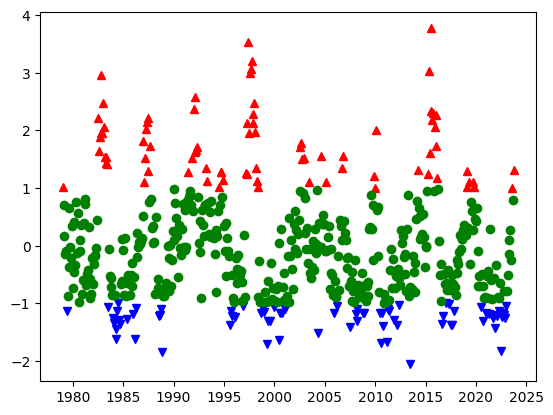

In [5]:
plt.plot(df_enso['Date'],positive,'r^')
plt.plot(df_enso['Date'],negative,'bv')
plt.plot(df_enso['Date'],neutral,'go') ;

In [6]:
# count values for each phase
positive_count = positive.count()
neutral_count = neutral.count()
negative_count = negative.count()

# print the counts
print('Positive: ', positive_count)
print('Neutral: ', neutral_count)
print('Negative: ', negative_count)

counts = [positive_count, neutral_count, negative_count]
print(counts)

Positive:  80
Neutral:  380
Negative:  78
[np.int64(80), np.int64(380), np.int64(78)]


In [7]:
# open precipitation data
file_precip = '/scratch/myuan5/CLIM680/1precip.mon.total.v401.nc'
ds_precip = xr.open_dataset(file_precip)
ds_precip

<xarray.Dataset> Size: 1GB
Dimensions:  (lat: 360, lon: 720, time: 1380)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 11kB 1900-01-01 1900-02-01 ... 2014-12-01
Data variables:
    precip   (time, lat, lon) float32 1GB ...
Attributes:
    Conventions:    CF-1.0
    Source:         http://climate.geog.udel.edu/~climate/html_pages/Global2_...
    version:        4.01
    history:        created 2/2016 by CAS NOAA/ESRL PSD
    title:          Terrestrial Air Temperature and Precipitation: V4.01
    dataset_title:  Terrestrial Air Temperature and Precipitation: 1900-2014 ...
    source:         http://climate.geog.udel.edu/~climate/
    References:     https://www.psl.noaa.gov/data/gridded/data.UDel_AirT_Prec...

In [8]:
# match data time ranges
start_date = df_enso['Date'].iloc[0]
end_date = df_enso['Date'].iloc[-1]

da_precip = ds_precip.precip.sel(time=slice(start_date, end_date))
da_precip

<xarray.DataArray 'precip' (time: 432, lat: 360, lon: 720)> Size: 448MB
[111974400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 1979-01-01 1979-02-01 ... 2014-12-01
Attributes:
    units:         cm
    var_desc:      Precipitation
    level_desc:    Surface
    statistic:     Total
    parent_stat:   Other
    long_name:     Monthly total of precipitation
    cell_methods:  time: sum
    avg_period:    0000-01-00 00:00:00
    actual_range:  [  0.   776.75]
    dataset:       Univ. of Delaware Precipitation and Air Temp v4.01
    valid_range:   [   0. 1200.]

In [17]:
#make anomalies of precipitation
da_climo = da_precip.groupby('time.month').mean()
da_anoms = da_precip.groupby('time.month')-da_climo
da_anoms

<xarray.DataArray 'precip' (time: 432, lat: 360, lon: 720)> Size: 448MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00305556, -0.0025    , -0.0025    , ..., -0.00305556,
         -0.00305556, -0.00305556],
        [-0.0025    , -0.0025    , -0.0025    , ..., -0.0025    ,
         -0.0025    , -0.0025    ],
        [ 0.00611111,  0.00611111,  0.00611111, ...,  0.00611111,
          0.00611111,  0.00611111]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.0025    , -0.0025    , -0.0025    , ..., -0.0025    ,
         -0.0025    , -0.0025    ],
        [-0.00138889, -0.00138889, -0.00138889, ..., -0.00138889,
         -0.00138889, -0.00138889],
        [-0.00055556, -0.00055556, -0.00055556, ..., -0.00083333,
         -0.00083333, -0.00055556]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00333333, -0.00333333, -0.00333333, ..., -0.00333333,
         -0.00333333, -0.00333333],
        [-0.00694445, -0.00694445, -0.00694445, ..., -0.00694445,
         -0.00694445, -0.00694445],
        [-0.00111111, -0.00111111, -0.00111111, ..., -0.00111111,
         -0.00111111, -0.00111111]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 3kB 1979-01-01 1979-02-01 ... 2014-12-01
    month    (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12

In [24]:
positive_time = df_enso.loc[positive.dropna().index, 'Date']
negative_time = df_enso.loc[negative.dropna().index, 'Date']
neutral_time = df_enso.loc[neutral.dropna().index, 'Date']

positive_time = pd.to_datetime(positive_time)
negative_time = pd.to_datetime(negative_time)
neutral_time = pd.to_datetime(neutral_time)

matching_positive = positive_time[positive_time.isin(da_anoms['time'].values)]
matching_negative = negative_time[negative_time.isin(da_anoms['time'].values)]
matching_neutral = neutral_time[neutral_time.isin(da_anoms['time'].values)]

In [25]:
positive_precip = da_anoms.sel(time=matching_positive.values).mean(dim='time')
negative_precip = da_anoms.sel(time=matching_negative.values).mean(dim='time')
neutral_precip = da_anoms.sel(time=matching_neutral.values).mean(dim='time')

comp_precip = [positive_precip, negative_precip, neutral_precip]
comp_precip

[<xarray.DataArray 'precip' (lat: 360, lon: 720)> Size: 1MB
 array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00566308, -0.00561828, -0.00561828, ..., -0.0059095 ,
         -0.00586021, -0.00566308],
        [-0.0052509 , -0.0052509 , -0.0052733 , ..., -0.00527778,
         -0.0052509 , -0.0052509 ],
        [-0.00426523, -0.00427867, -0.00427867, ..., -0.00428315,
         -0.00428315, -0.00426523]], dtype=float32)
 Coordinates:
   * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
   * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8,
 <xarray.DataArray 'precip' (lat: 360, lon: 720)> Size: 1MB
 array([[           nan,            nan,            nan, ...,
 

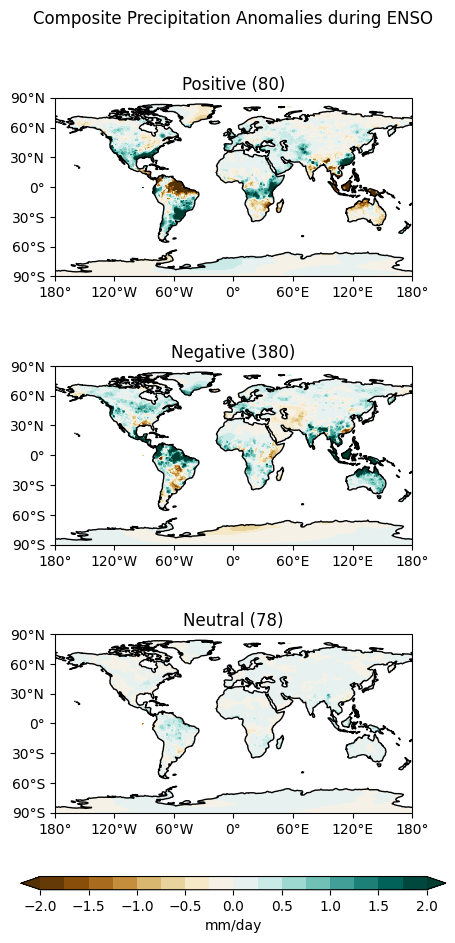

In [26]:
labels=['Positive','Negative', 'Neutral']
clevs = np.arange(-2.0,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_precip):

        # Select the season
        data = comp_precip[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        
        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO') ;

In [27]:
#calculate differences
diff_precip=[positive_precip-neutral_precip, 
             negative_precip-neutral_precip]

Text(0.5, 0.98, 'Composite Precipitation Differences during ENSO')

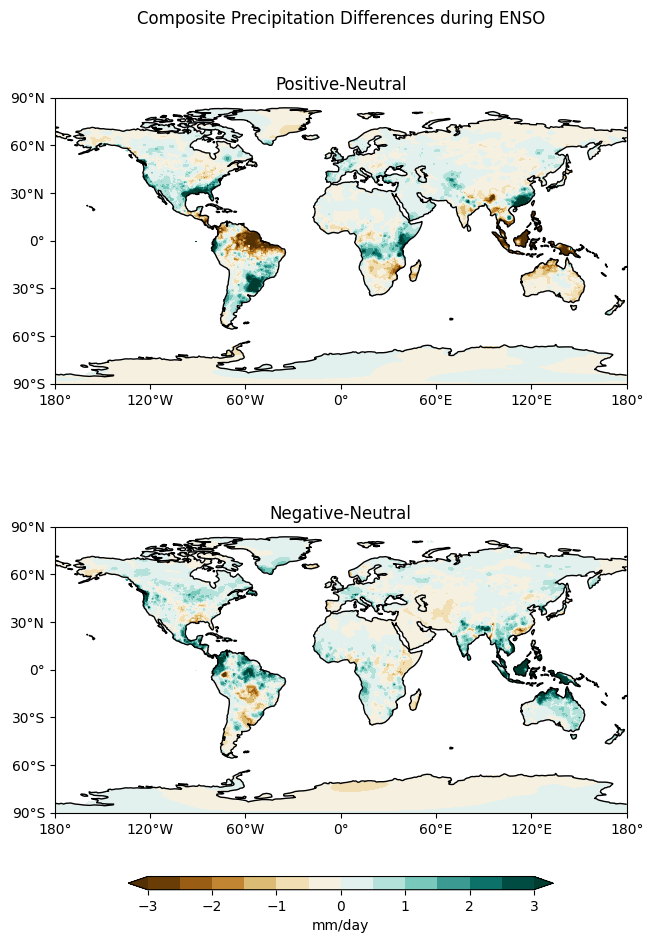

In [32]:
labels=['Positive-Neutral','Negative-Neutral']
clevs=np.arange(-3,3.5,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(diff_precip):

        # Select the season
        data = diff_precip[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=diff_precip[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons,diff_precip[i]['lat'],data,clevs,
                          transform=ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences during ENSO')

In [30]:
p = 0.05 # 95% confidence level, or 5% likelihood that the result arose by chance

In [34]:
from scipy.stats import ttest_ind

positive_precip_vals = da_anoms.sel(time=matching_positive.values)
negative_precip_vals = da_anoms.sel(time=matching_negative.values)
neutral_precip_vals = da_anoms.sel(time=matching_neutral.values)

In [35]:
tstat,pval = ttest_ind(positive_precip_vals, 
                neutral_precip_vals, 
                equal_var = False)

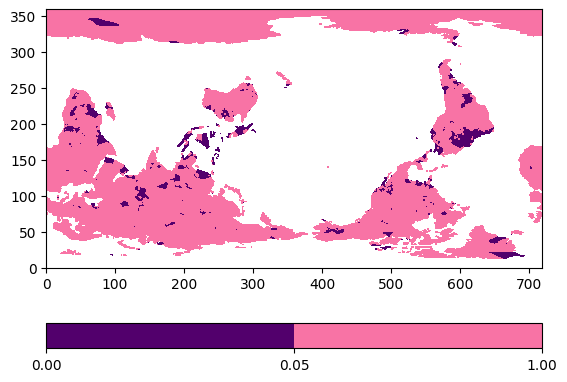

In [36]:
plt.contourf(pval,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal') ;

In [37]:
mask_diff = diff_precip[0].where(pval <= p)
mask_diff

<xarray.DataArray 'precip' (lat: 360, lon: 720)> Size: 1MB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.00628858, -0.00628858, -0.00631983, ..., -0.0063252 ,
        -0.00628858, -0.00628858],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8

Text(0.5, 0.98, 'Composite Precipitation Differences Positive-Neutral')

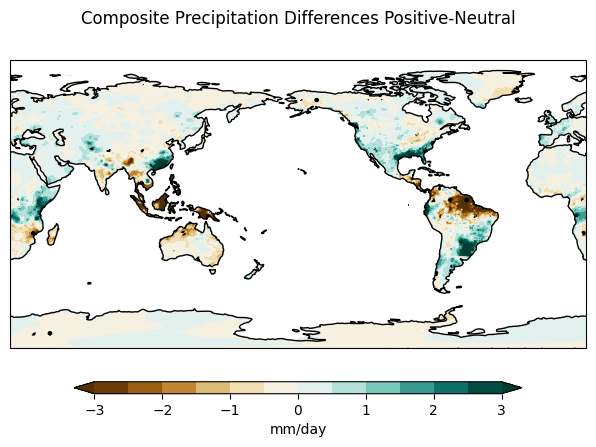

In [39]:
labels=['Positive vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})


data=diff_precip[0]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_precip[0]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Overlay of stippling
ss=axs.contourf(lons,diff_precip[0]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['.',''],extend='both',alpha=0.0)
#change to hatches=['///',''] to get parallel lines

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences Positive-Neutral')

In [40]:
tstat_neg,pval_neg = ttest_ind(negative_precip_vals, 
                neutral_precip_vals, 
                equal_var = False)

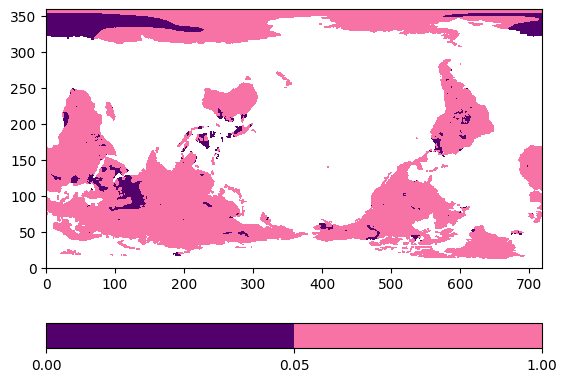

In [41]:
plt.contourf(pval_neg,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal');

In [42]:
mask_diff_neg = diff_precip[1].where(pval_neg <= p)
mask_diff_neg

<xarray.DataArray 'precip' (lat: 360, lon: 720)> Size: 1MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8

Text(0.5, 0.98, 'Composite Precipitation Differences Negative-Neutral')

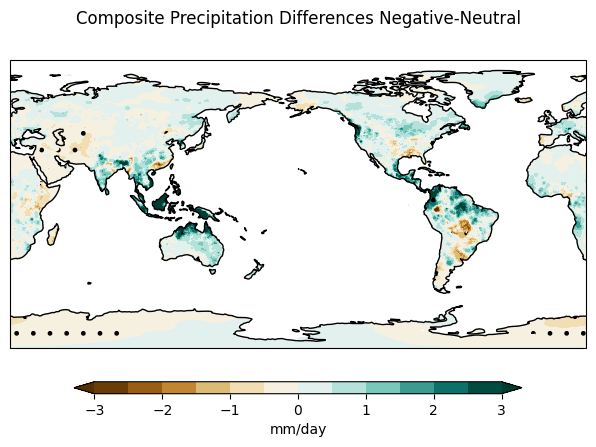

In [44]:
labels=['Negative vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})


data=diff_precip[1]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[1]['lon'])
mask_data,lons=add_cyclic_point(mask_diff_neg,coord=diff_precip[1]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_precip[1]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Overlay of stippling
ss=axs.contourf(lons,diff_precip[1]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['.',''],extend='both',alpha=0.0)
#change to hatches=['///',''] to get parallel lines

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences Negative-Neutral')